In [7]:
import grid_generation as grid

import numpy as np
import seaborn as sns

In [8]:
def plot_signatures(signatures):
    
    sns.set_palette("RdBu", 10)
    sns.set_style("ticks",{'axes.grid' : False})

    ax = sns.scatterplot(x = signatures[:, 0], y = signatures[:, 1])

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set(xlabel='State[0]', ylabel='State[1]')

### **The grid generation** 

The grid generation is one of the most important steps in our experiments, as it defines the granularity of our mixture approximations. There is some literature related to designing optimal grids (http://www.quantize.maths-fi.com/symposium, for instance), however, we will only adopt a few common-sense heuristics.

For the moment, our code is only capable of designing **hypercubic axis-aligned grids** in which the spacing for each axis may be equally or unequally distributed.  

In [9]:
type_partition = ('equally', 'unequally_linear')
unbounded_region = np.array([[np.inf, np.inf], [np.inf, np.inf]]) #a representation choice for the unbounded region

##### Building a bi-modal grid

In this notebook, we show how to build a bi-modal grid (useful for bi-modal initial distributions, for instance).

In [10]:
#Parameters
n_partitions = [20, 20] #nb of partitions per axis

#Mode 1
vertice_lower_1 = [-8, -7]
vertice_upper_1 = [-1, 0]

#Mode 2
vertice_lower_2 = [0, 2]
vertice_upper_2 = [4, 7]

##### 1) Uniform spacing

In this case, all axis are spaced uniformly. In our experiments, this leads to a loss of performance since we know in advance that the subregions around the center of the hypercube have greater probability.

This observation motivates the construction of grids in which the spacing closer to the center is smaller (i.e. more signatures) - which can be seen in the next section.

Number of signatures: 722


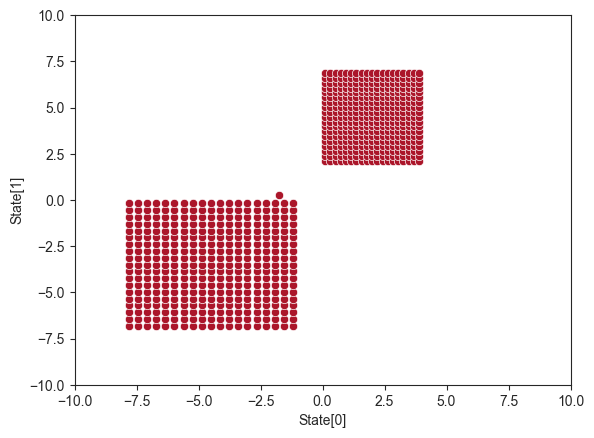

In [11]:
#Build HPR (High Probability Region) 1
hpr_1 = np.array([vertice_lower_1, vertice_upper_1])
hpr_2 = np.array([vertice_lower_2, vertice_upper_2])
outer_signature = grid.compute_outer_point([hpr_1, hpr_2], 0.5) # compute outer signature (outside both HPR 1 and HPR 2)

#Construct grids (bounded subregions) for each HPR 
hpr_partition_1 = grid.createRegionPartitions(hpr_1, n_partitions, type_partition[0])
hpr_partition_2 = grid.createRegionPartitions(hpr_2, n_partitions, type_partition[0])

#Build regions (concatenation of all HPR partitions)
regions = np.vstack((hpr_partition_1, hpr_partition_2))

#Place signatures on bounded regions
signatures = grid.placeSignatures(regions)

#Add representations for unbounded regions
regions, signatures = grid.addUnboundedRepresentations(regions, unbounded_region, signatures, outer_signature)

plot_signatures(signatures)

##### 2) Non-uniform spacing

The non-uniform spacing is defined in such a way that the subregions around the center are more densely populated.

Number of signatures: 1458


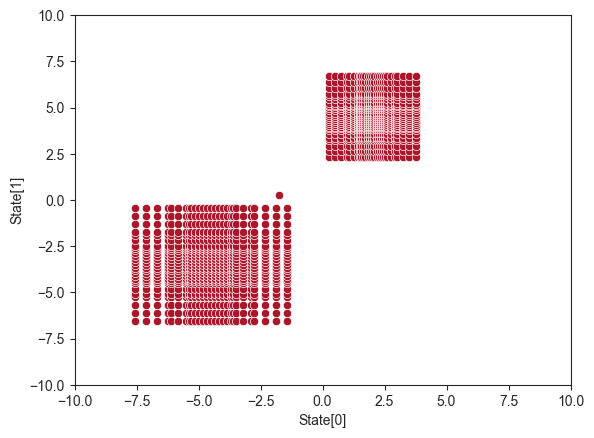

In [12]:
#Build HPR (High Probability Region) 1
hpr_1 = np.array([vertice_lower_1, vertice_upper_1])
hpr_2 = np.array([vertice_lower_2, vertice_upper_2])
outer_signature = grid.compute_outer_point([hpr_1, hpr_2], 0.1) # compute outer signature (outside both HPR 1 and HPR 2)

#Construct grids (bounded subregions) for each HPR 
hpr_partition_1 = grid.createRegionPartitions(hpr_1, n_partitions, type_partition[1])
hpr_partition_2 = grid.createRegionPartitions(hpr_2, n_partitions, type_partition[1])

#Build regions (concatenation of all HPR partitions)
regions = np.vstack((hpr_partition_1, hpr_partition_2))

#Place signatures on bounded regions
signatures = grid.placeSignatures(regions)

#Add representations for unbounded regions
regions, signatures = grid.addUnboundedRepresentations(regions, unbounded_region, signatures, outer_signature)

plot_signatures(signatures)